# Taller de Física Computacional
---
## 1er Parcial
### 29 de octubre de 2020

**IMPORTANTE**:

- Resuelva los ejercicios en un notebook nuevo que deber ́a subir como
respuesta a esta tarea una vez resuelto.

- Comente el código de manera que sea legible por otra persona.

- Todas las celdas deben ejecutar sin error. Se recomienda hacer un re-
inicio del n ́ucleo y evaluar todas las celdas en orden para asegurarse que ejecuta como corresponde antes de entregar.

- Lea **atentamente** las consignas.

In [1]:
#Importamos acá todas las librerías a usar

import matplotlib.pyplot as plt
#Set unicode latex support
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

import numpy as np
import math
#import cmath

#Implementacion de una comparacion de punto flotantes
def float_compare(x1,x2):
    #Relative epsilon comparison by Bruce Dawson
    eps = np.finfo(float).eps
    X1 = np.abs(x1)
    X2 = np.abs(x2)

    diff = np.abs(x1 - x2)
    largest = X2 if X2 > X1 else X1

    if diff <= (largest * eps) :
        return True
    else:
        return False

print("Libraries & common functions imported")

Libraries & common functions imported


**Ejercicio 1** *(20 puntos)* Graficar la función
$$f(x) = e^{-x}sin 10x$$
en el intervalo [0,10]

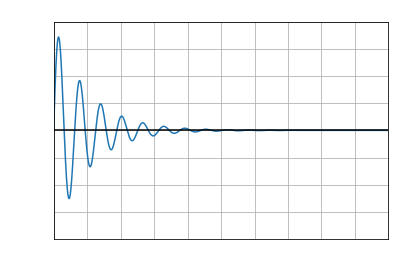

In [2]:
#Primero generamos las listas con los datos a plotear

def f(x):
    #definimos f(x)
    return np.exp(-x) * np.sin(10 * x)

xmin = 0
xmax = 10
n_intervalos = 10000
xs = []
ys = []

#Generamos los datos de entrada y Evaluamos la función
for i in range(n_intervalos):
    xvalue = xmin + (i * (xmax - xmin) / n_intervalos)
    yvalue = f(xvalue)
    xs.append(xvalue)
    ys.append(yvalue)

plt.plot(xs,ys,label = 'f(x)')
plt.xlabel('x', color = 'white')
plt.ylabel('f(x)', color = 'white')
plt.xlim(0,10)
plt.xticks(np.arange(11))
plt.ylim(-1,1)
plt.title(r"$f(x) = e^{-x} sin(10 x)$", color = 'white')
plt.axhline(0,color ='black')
plt.tick_params(axis = 'both', which = 'both', color = 'white', labelcolor = 'white')
plt.grid(b = True)

> (20 puntos) Perfecto. Cool lo del título.

**Ejercicio 2** *(20 puntos)* Implementar una función que clasifique un triángulo como
rectángulo, acutángulo u obtusángulo dadas las longitudes de sus lados
a, b y c (números reales) en base a las condiciones enumeradas en la
siguiente tabla:

| Condición                    | Tipo                         |
|:----------------------------:|:----------------------------:|
| si $$a^{2} + b^{2} = c^{2}$$ | el triándulo es rectángulo   |
| si $$a^{2} + b^{2} > c^{2}$$ | el triángulo es acutángulo   |
| si $$a^{2} + b^{2} < c^{2}$$ | el triángulo es obstusángulo |


In [3]:
#Generamos nuestra función para clasificar triángulos
def clas_trangulo(a,b,c):

    if float_compare(np.square(a) + np.square(b), np.square(c)):
        return "Rectángulo"
    else:
        if np.square(a) + np.square(b) > np.square(c):
            return "Acutángulo"
        elif np.square(a) + np.square(b) < np.square(c):
            return "Obtusángulo"

#Test función clasificación
#Triángulo rectangulo
a=3
b=4
c=5
print(f"El triángulo de lados: a={a}, b={b}, c={c} es {clas_trangulo(a,b,c)}")

#Triángulo Obtusángulo
a=6.25
b=9
c=25
print(f"El triángulo de lados: a={a}, b={b}, c={c} es {clas_trangulo(a,b,c)}")

#Triángulo Acutángulo
a=3
b=3
c=3
print(f"El triángulo de lados: a={a}, b={b}, c={c} es {clas_trangulo(a,b,c)}")

El triángulo de lados: a=3, b=4, c=5 es Rectángulo
El triángulo de lados: a=6.25, b=9, c=25 es Obtusángulo
El triángulo de lados: a=3, b=3, c=3 es Acutángulo


> (20 puntos) Excelente. Bien por armar el comparador.

**Ejercicio 3** *(20 puntos)* Implementar una función que determine las componentes
del vector $C$, donde $C = A × B$ es el producto vectorial entre los
vectores $A$ y $B$. Nota: usar *numpy.cross* o similar es **trampa**.


In [4]:
def cross_prod(A,B):
     #Función que calcula el producto vectorial de dos vectores
     C = [0,0,0] #lista a co

     #Chequear dimension de los vectores
     if len(A) != 3 or len(B) != 3:
         print("Vectores de dimensión incorrecta")
         return "Dimensional Error"
     else:
         C[0] = A[1] * B[2] - A[2] * B[1]
         C[1] = A[0] * B[2] - A[2] * B[0]
         C[2] = A[0] * B[1] - A[1] * B[0]
         return C

#Test producto vectorial
vector_A = [1,0,0]
vector_B = [0,1,0]

print(f"A({vector_A}) x B({vector_B}) = C({cross_prod(vector_A,vector_B)})")

#Test 2
vector_A = [0,0]
vector_B = [0,1,0]

print(f"A({vector_A}) x B({vector_B}) = C({cross_prod(vector_A,vector_B)})")

A([1, 0, 0]) x B([0, 1, 0]) = C([0, 0, 1])
Vectores de dimensión incorrecta
A([0, 0]) x B([0, 1, 0]) = C(Dimensional Error)


(20 puntos) Perfecto

**Ejercicio 4** *(20 puntos)* La ecuación Pitagórica
$$ i^{2} + j^{2} = k^{2} $$
tiene un número infinito de soluciones enteras **positivas** llamadas “triplas Pitagóricas”.

- a *(10 puntos)* Diseñar e implementar una función que calcule (imprima) todas las triplas Pitagóricas para un dado m tal que i ≤ m, j ≤ m y k ≤ m. No importa si el código devuelve algunas triplas
repetidas.

- b *(10 puntos)* Modificar la función para “probar” que el ultimo teorema de Fermat, que asegura que no existe ninguna solución de
enteros positivos a
$$i^{n} + j^{n} = k^{n}$$
es válido hasta un cierto entero positivo m.

- c (**opcional**) Modificar la función del ítem (a) para que devuelva una secuencia de tuplas que contenga las triplas  ́unicas.

In [9]:
def funcion_a(m):

    #Recorremos las posibles triplas con for anidados
    for i in range(m):
        for j in range(m):
            for k in range(m):
                if float_compare(np.square(i) + np.square(j), np.square(k)):
                    print(f"Tripla pitagórica encontrada: i={i}, j={j}, k={k}")

def funcion_b(n,m):
    #Enunciado del teorema de fermat
    #Si n es un número entero mayor o igual que 3,
    #entonces no existen números enteros positivos "x", "y" y "z",
    #tales que se cumpla la igualdad:  x^n + y^n = z^n
    #esto no estaba demostrado?
    m = 3 #Variable a recorrer inicializada en 3
    for i in range(1,m+1):
        for j in range(1,m+1):
            for k in range(1,m+1):
                if float_compare(np.power(i,m) + np.power(j,m), np.power(k,m)):
                    print(f"Fermat estaba mal: i={i}, j={j}, k={k}, n={m}")
                    break

def funcion_c():
    #Recorremos las posibles triplas con for anidados
    for i in range(m):
        for j in range(m):
            for k in range(m):
                if float_compare(np.square(i) + np.square(j), np.square(k)):
                    print(f"Tripla pitagórica encontrada: i={i}, j={j}, k={k}")

#test función_a
#m = int(input("Ingrese un número entero m para encontrar triplas pitagóricas: \n"))
#funcion_a(m)
#Test función_b
#funcion_b(3,5)

#Test funcioin_c
#función_c()

#solo funciona la funcion_a,
#funcion_b no terminé de entender que había que probar

In [12]:
m=10
funcion_a(100)

Tripla pitagórica encontrada: i=0, j=0, k=0
Tripla pitagórica encontrada: i=0, j=1, k=1
Tripla pitagórica encontrada: i=0, j=2, k=2
Tripla pitagórica encontrada: i=0, j=3, k=3
Tripla pitagórica encontrada: i=0, j=4, k=4
Tripla pitagórica encontrada: i=0, j=5, k=5
Tripla pitagórica encontrada: i=0, j=6, k=6
Tripla pitagórica encontrada: i=0, j=7, k=7
Tripla pitagórica encontrada: i=0, j=8, k=8
Tripla pitagórica encontrada: i=0, j=9, k=9
Tripla pitagórica encontrada: i=0, j=10, k=10
Tripla pitagórica encontrada: i=0, j=11, k=11
Tripla pitagórica encontrada: i=0, j=12, k=12
Tripla pitagórica encontrada: i=0, j=13, k=13
Tripla pitagórica encontrada: i=0, j=14, k=14
Tripla pitagórica encontrada: i=0, j=15, k=15
Tripla pitagórica encontrada: i=0, j=16, k=16
Tripla pitagórica encontrada: i=0, j=17, k=17
Tripla pitagórica encontrada: i=0, j=18, k=18
Tripla pitagórica encontrada: i=0, j=19, k=19
Tripla pitagórica encontrada: i=0, j=20, k=20
Tripla pitagórica encontrada: i=0, j=21, k=21
Tripla p

Tripla pitagórica encontrada: i=34, j=0, k=34
Tripla pitagórica encontrada: i=35, j=0, k=35
Tripla pitagórica encontrada: i=35, j=12, k=37
Tripla pitagórica encontrada: i=35, j=84, k=91
Tripla pitagórica encontrada: i=36, j=0, k=36
Tripla pitagórica encontrada: i=36, j=15, k=39
Tripla pitagórica encontrada: i=36, j=27, k=45
Tripla pitagórica encontrada: i=36, j=48, k=60
Tripla pitagórica encontrada: i=36, j=77, k=85
Tripla pitagórica encontrada: i=37, j=0, k=37
Tripla pitagórica encontrada: i=38, j=0, k=38
Tripla pitagórica encontrada: i=39, j=0, k=39
Tripla pitagórica encontrada: i=39, j=52, k=65
Tripla pitagórica encontrada: i=39, j=80, k=89
Tripla pitagórica encontrada: i=40, j=0, k=40
Tripla pitagórica encontrada: i=40, j=9, k=41
Tripla pitagórica encontrada: i=40, j=30, k=50
Tripla pitagórica encontrada: i=40, j=42, k=58
Tripla pitagórica encontrada: i=40, j=75, k=85
Tripla pitagórica encontrada: i=41, j=0, k=41
Tripla pitagórica encontrada: i=42, j=0, k=42
Tripla pitagórica encon

In [14]:
m = 10
funcion_b(100,3)

> (20 puntos) El buscador está bien, los ceros no deberían estar incluídos (son soluciones triviales) pero el enunciado no aclara así que no hay problema. No veo acá la necesidad de usar el comparador de flotantes porque sn todos enteros. La b funciona bien por lo que puedo ver. El teorema de Fermat está probado sip. La idea es jugar un poco nomás ;)

**Ejercicio 5** *(20 puntos)* Una serie de Fourier tiene la forma
$$ s(x) = \frac{a_{0}}{2} + \sum^{N}_{i=1}(a_{n}cos(nx) + b_{n}sin(nx))$$

y puede aproximar (con valores adecuados de {an} y {bn}) cualquier
función periódica de período 2π.

a) *(8 puntos)* Implementar una función que acepte como parámetros
dos listas conteniendo los conjuntos de coeficientes {an} y {bn}
y evalúe la correspondiente serie de Fourier para un argumento
$x ∈ \mathbb{R}$.

b) *(8 puntos)* Utilizar la función anterior para implementar una nueva
función que evalúe la serie de Fourier de la función serrucho para
la cual:
$$a_{n} = 0 \ \ \ \forall\ n$$

y
$$b_{n} = \frac{2(-1)^{n+1}}{n\pi} \ \forall \ n \geq 1$$

c) *(4 puntos)* Comparar gráficamente la aproximación de orden 10
para la función serrucho. Utilizar la siguiente definición para la
función serrucho:

```python
def f(x):
    return 2*((x+1/2) - math.floor(x+1/2)) - 1
```

Nota: En esta definición f(x) es periódica con período 1.

coeficientes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.6366197723675814, -0.3183098861837907, 0.2122065907891938, -0.15915494309189535, 0.12732395447351627, -0.1061032953945969, 0.09094568176679733, -0.07957747154594767, 0.0707355302630646, -0.06366197723675814]


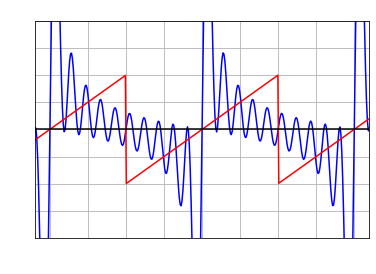

In [23]:
def fourier_aprox(x,a0,an,bn,n):

    #Calcular aproximación por series de fourier
    # x: valor en el cual se aproxima la función
    # a0:: termino a0
    # an & bn : listas correspondientes a los coeficientes
    #T: periodo de la función
    #n:orden de aproximación

    #print(x,"\n",a0,"\n",an,"\n",bn,"\n",n)
    fa = (a0 / 2) #asignamos primero el valor promedio
    for i in range(1,n+1):
        fa += (an[0] * np.cos(i * x)) + (bn[0] * np.sin(i * 2 * np.pi * x))
        #print(fa)
    return fa


def funcion_serrucho_fa(x,m):

    #Aproximación función serrucho
    #x: serie de entradas de datos
    #m: orden de aproximación

    #Generamos primero los coeficientes de aproximación
    a_0 = 0
    a_n = []
    b_n = []
    for i in range(m):
        n = i + 1
        a = 0
        b = (2 * np.power(-1, n + 1)) / (n * np.pi)
        a_n.append(a)
        b_n.append(b)

    print("coeficientes:",a_n,b_n)
    ys = []
    for i in range(len(x)):
        y = fourier_aprox(x[i],a_0,a_n,b_n,m)
        ys.append(y)
    return ys

def funcion_serrucho(x):
    ys = []
    for i in range(len(x)):
        y = 2*((x[i]+1/2) - math.floor(x[i]+1/2)) - 1
        ys.append(y)
    return ys

#######################################################################
#Realizamos la comparación gráfica
#Primero generamos la serie de datos de entrada (x) _& salida

xmin = -3
xmax = 3
n_intervalos = 1000
xs = []

#Generamos los datos de entrada y Evaluamos la función
for i in range(n_intervalos):
    xvalue = xmin + (i * (xmax - xmin) / n_intervalos)
    xs.append(xvalue)

#Aproximación de orden 10 para la función serrucho
aprox_order = 10
fs_fa = funcion_serrucho_fa(xs,aprox_order)

#Definición función serrucho
fs = funcion_serrucho(xs)


#######################################################################

#Finalmente compramos graficamente
#Ploteamos la aproximación
plt.plot(xs,fs_fa,color = 'blue')
#Luego la funcion real
plt.plot(xs,fs, color = 'red')
plt.xlabel('x', color = 'white')
plt.xlim(-1.1,1.1)
plt.ylim(-2,2)
plt.title("Comparación función serrucho vs Apróx. por serie de fourier", color = 'white')
plt.axhline(0,color ='black')
plt.tick_params(axis = 'both', which = 'both', color = 'white', labelcolor = 'white')
plt.grid(b = True)

#Bueno claramente algo estoy haciendo muy mal

> (5 puntos) Estuve toqueteando un poco y no logro entender porque no anda bien, de entrada estás usando siempre el bn[0] en todos los términos, pero cambié eso y no alcanza. No me da el tiempo para debugguear todo, pero intentalo vos! Es un buen examen, está bien comentado. Como recomendación sugiero en el futuro separar más en celdas independientes para poder probar mejor. La prueba en el último se dificulta mucho en parte porque está todo en una celda.